# Cleaning

## Importing Libraries
the next block will be responsible for installing and importing the necessary libraries and functions for this section.

download necesery packages

In [ ]:
# !pip install googletrans==3.1.0a0
# !pip install wordcloud

In [ ]:
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import os

import pandas as pd
import numpy as np

from googletrans import Translator

import matplotlib.pyplot as plt      

from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

from wordcloud import WordCloud


The `merge_all_dfs()` function get an array of DataFrames and merge them all to once

In [ ]:
def load_dataset(file_name):
    df = pd.read_csv(file_name, encoding = 'utf-8-sig')
    return df

def save_df(df, file_path):
    df.to_csv(file_path, encoding = 'utf-8-sig',index = False)
    
def merge_all_dfs(dfs_array):
    all = pd.concat(dfs_array, ignore_index=True)
    all = all.drop(columns = ['Unnamed: 0'], axis = 1)
    return all

# Data Translate
Originaly, our data is in Hebrew but for the Meachine Learning section we preferred to translate the data to english.

To avoid new crawling from <https://easy.co.il> we used `googletrans` package to translate the data

setting the translator

In [ ]:
translator = Translator()

translate all the 12 **resturants** files to english

In [ ]:
for i in range(1,13):
    file_name = '.' + os.sep + 'hebrew_data' + os.sep + 'resturants' + str(i) + '.csv'
    df = load_dataset(file_name)
    df['Name'] = df['Name'].apply(lambda x:translator.translate(x, dest='en').text)
    df['Address'] = df['Address'].apply(lambda x:translator.translate(x, dest='en').text)
    df['Opening Hours'] = df['Opening Hours'].apply(lambda x:translator.translate(x, dest='en').text)
    df['Type'] = df['Type'].apply(lambda x:translator.translate(x, dest='en').text)

    new_path='.' + os.sep + 'translated' + os.sep + 'resturants' + str(i) + '.csv'

    save_df(df,new_path)

translate all the 12 **comments** files to english

In [ ]:

for i in range(1,13):
    file_name = '.' + os.sep + 'hebrew_data' + os.sep + 'comments' + str(i) + '.csv'
    df = load_dataset(file_name)
    df['resturant_name'] = df['resturant_name'].apply(lambda x:translator.translate(x, dest='en').text)
    df['customer_name'] = df['customer_name'].apply(lambda x:translator.translate(x, dest='en').text)
    df['comments'] = df['comments'].apply(lambda x:translator.translate(x, dest='en').text)

    new_path='.' + os.sep + 'translated' + os.sep + 'comments' + str(i) + '.csv'

    save_df(df,new_path)

# Data Cleaning
After we got the data from <https://easy.co.il> we had to merge all the `.csv` file to one big file and then clean it

In the `data_arrangement()` function we load all the 12 files for each df and merge all to once with the previous function

The `prepare_data(df)` function drop duplicates from the df

In [ ]:
def data_arrangement():
    comments_dfs = []
    resturants_dfs = []
    for i in range(1,13):
        file_name = '.' + os.sep + 'translated' + os.sep + 'comments' + str(i) + '.csv'
        comments_dfs.append(load_dataset(file_name))

    for i in range(1,13):
        file_name = '.' + os.sep + 'translated' + os.sep + 'resturants' + str(i) + '.csv'
        resturants_dfs.append(load_dataset(file_name))

    all_comments = merge_all_dfs(comments_dfs)
    all_resturants = merge_all_dfs(resturants_dfs)

    save_df(all_comments,  '.' + os.sep + 'data' + os.sep + 'all_comments.csv')
    save_df(all_resturants,  '.' + os.sep + 'data' + os.sep + 'all_resturants.csv')
    return all_comments, all_resturants

def prepare_data(df):
    df_copy = df.copy()
    # df_copy = df_copy.drop(columns = ['Unnamed: 0.1'], axis = 1)
    df_copy.drop_duplicates(subset=df_copy.columns.difference([0]), inplace = True)

    return df_copy
    

for each empty cell in the **resturants df** we replace by this rules:

| Column      | New Value |
| ----------- | ----------- |
| facebook      | www.facebook.com       |
| instagram   | www.instagram.com        |
| home page      | www.google.com       |
| Positive Reviews Count   | replace -1 to 0        |
| Negative Reviews Count      | replace -1 to 0       |
| Expert Reviews Count   | replace -1 to 0        |
| postal code      | average of all postal codes |

In [ ]:
def clean_resturants_data(df):
    df_copy = df.copy()
    df_copy["Facebook Url"].fillna('https://www.facebook.com', inplace= True)
    df_copy["Instagram Url"].fillna('https://www.instagram.com', inplace= True)
    df_copy["Home Page Url"].fillna('https://www.google.com', inplace= True)
    df_copy=df_copy.replace({'Positive Reviews Count': {-1:0}})
    df_copy=df_copy.replace({'Negative Reviews Count': {-1:0}})
    df_copy=df_copy.replace({'Expert Reviews Count': {-1:0}})
    df_copy=df_copy.replace({'Postal Code': {0:int(all_resturants['Postal Code'].mean())}})

    
    return df_copy

for each empty cell in the **comments df** we replace by this rules:

| Column      | New Value |
| ----------- | ----------- |
| customer_reviews_number      | empty to 1       |
| number_number_of_star   | average of the resturant        |


In [ ]:
def clean_comments_data(df):
    df_copy = df.copy()
    df_copy["customer_reviews_number"].fillna('1', inplace= True)
    avg = df_copy.groupby(['resturant_name'])['number_number_of_star'].mean().astype(int)
    df_copy['number_number_of_star'] = df_copy['number_number_of_star'].fillna(df_copy.groupby('resturant_name')['number_number_of_star'].transform('mean').astype(int))

    
    return df_copy

#### Run the cleaning

In [ ]:
all_comments , all_resturants = data_arrangement()
all_comments = load_dataset('.' + os.sep + 'data' + os.sep + 'all_comments.csv')
all_resturants = load_dataset('.' + os.sep + 'data' + os.sep + 'all_resturants.csv')
all_resturants = prepare_data(all_resturants)
all_comments = prepare_data(all_comments)
all_resturants = clean_resturants_data(all_resturants)
save_df(all_resturants,'.' + os.sep + 'data' + os.sep + 'cleaned_resturants.csv')
all_comments = clean_comments_data(all_comments)
save_df(all_comments,'.' + os.sep + 'data' + os.sep + 'cleaned_comments.csv')

all_resturants
all_comments

,Name,Phone,Address,Opening Hours,Type,Rating,Has Deliveries,Has Table Reservation,Has Menu,Has Sending A Massage,...,Instagram Url,Home Page Url,Positive Reviews Count,Negative Reviews Count,Expert Reviews Count,Number Of Visits In Last Month,Number Of Reviews,Number Of Top 3,Has Discounts And Benefits,Postal Code
0,Soso & Sans,03-9552541,"Moshe Levy 10, Rishon Lezion",First\n 12: 00-01: 00\nCrimson\n 12: 00-01: ...,Hamburger chain,7.8,True,False,True,True,...,https://www.instagram.com/Susu.rishon/,http://susu.co.il,34,14,1.0,1311,1,14,False,7565825
1,Brothers Local Burger,03-6351372,"The Founders 1, Kiryat Ono",First\n 11: 30-22: 00\nCrimson\n 11: 30-22: ...,Hamburgeria,9.9,True,False,True,True,...,https://www.instagram.com,http://www.brotherslocalburger.co.il,59,14,0.0,892,1076,26,False,5552101
2,Sun Ron,052-3662285,"Yehuda Halevi 44, Tel Aviv-Yafo",First\n 11: 30-17: 00\nCrimson\n 11: 30-17: ...,Fast food restaurant,6.8,True,False,True,True,...,https://www.instagram.com/Saone.rhone/,http://saonerhone.co.il,24,0,4.0,1672,4,6,False,6610201
3,OCD,03-5566774,"Tirza 17, Tel Aviv-Yafo",First\n closed\nCrimson\n 18: 45-23: 45\nThir...,Restaurant,9.7,True,True,True,True,...,https://www.instagram.com,http://ocdtlv.com,6,6,1.0,3626,1,0,False,6811559
4,Motpak,054-9072666,"Derech Shlomo 110, Tel Aviv-Yafo",First\n 10: 00-20: 00\nCrimson\n 10: 00-20: ...,Shawarma,7.3,False,False,False,True,...,https://www.instagram.com,http://mutfak-turkish-restaurant.business.site,46,2,3.0,4915,3,26,False,6603227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Pita Besta,03-7502277,"Rothschild 71, Rishon Lezion",First\n 10: 45-until last customer\nCrimson\n...,Fast food chain,7.2,False,False,True,True,...,https://www.instagram.com/pitabasta_rlz/,http://pitabasta.com,6,1,0.0,373,445,0,False,7520270
250,Pizza first,03-9522890,"Sderot Zalman Shneur 16, Rishon Lezion",First\n 10: 00-24: 00\nCrimson\n 10: 00-24: ...,Pizzeria,9.7,False,False,True,False,...,https://www.instagram.com,http://pizzarishonim.co.il,13,0,0.0,576,166,6,False,7560807
252,Hummus Eliyahu,03-9615677,"Azrieli Mall Rishonim, Rishon Lezion",First\n 10: 30-21: 00\nCrimson\n 10: 30-21: ...,A network of chickpeas,7.6,False,False,True,False,...,https://www.instagram.com,http://humus-eli-yahoo.com,15,3,0.0,287,476,6,False,6070631
253,Pizza Pepe,03-7443939,"Arieh Ben Eliezer 31, Rishon Lezion",First\n 11: 30-22: 30\nCrimson\n 11: 30-22: ...,Pizzeria,9.7,False,False,True,True,...,https://www.instagram.com,http://pizza-papa.zapages.co.il,0,0,0.0,38,14,0,False,7522936


,resturant_name,customer_name,customer_reviews_number,customer_reviews_date,comments,number_number_of_star
0,Soso & Sans,Maor S.,3.0,01/05/2022,Took a hamburger with half an hour to arrive a...,3.0
1,Soso & Sans,Igor p.,2.0,18/03/2022,Expensive and very greasy and stingy,2.0
2,Soso & Sans,Yarin J.,1.0,20/02/2022,Better hospital rolls,3.0
3,Soso & Sans,Sharon R.,2.0,29/03/2021,The dishes are cool and delicious in a differe...,4.0
4,Soso & Sans,Sergei P.,26.0,22/07/2021,High price for something mediocre overall. The...,2.0
...,...,...,...,...,...,...
7278,Sorrento,Mrt G.,4.0,10/05/2022,Amazing service Food and drink come fast even ...,5.0
7572,The Canaanite,Omer A.,1.0,11/05/2022,Excellent chickpeas! Lots of varied and specia...,5.0
7689,Jaja,Tkuada A.,2.0,12/05/2022,The restaurant bar is among the best there is ...,5.0
7754,Sorrento,Mrt G.,4.0,12/05/2022,Amazing service Food and drink come fast even ...,5.0


Check for duplicates after cleaning

In [ ]:
all_resturants.duplicated().any()
all_comments.duplicated().any()

False

False

# Data Visualizations

In this section we will present visualizations for the data we collected 

In [30]:
all_comments = load_dataset('.' + os.sep + 'data' + os.sep + 'cleaned_comments.csv')
all_resturants = load_dataset('.' + os.sep + 'data' + os.sep + 'cleaned_resturants.csv')

In [ ]:
def pie_chart(data, labels, title):
    fig, ax = plt.subplots(figsize=(6, 6))

    patches, texts, pcts = ax.pie(
        data, labels=labels, autopct=lambda x: '{:.0f}'.format(x*data.sum()/100),
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'size': 'large', "weight":"600"},
        radius= 1.15,
        startangle=0)
    
    for i, patch in enumerate(patches):
        texts[i].set_color(patch.get_facecolor())
    plt.setp(pcts, color='white')
    plt.setp(texts, fontweight=600)
    ax.set_title(title, fontsize=18)
    plt.tight_layout()

    
def horizontal_bar_chart(data, labels, title, color):
    data = list(data)
    labels = list(labels)
 
    plt.barh(labels, data, color = color)
    plt.title(title)
    plt.show()
    
def two_columns_bar_chart(df, column1, column2, title):
    indexes = np.arange(len(df))
    width = 0.4

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.barh(indexes, df[column1], width, color='red', label=column1)
    ax.barh(indexes + width, df[column2], width, color='green', label=column2)
    
    ax.set_title(title, fontsize=18)
    ax.set(yticks=indexes + width, yticklabels=df.iloc[:,0].keys().tolist(), ylim=[2*width - 1, len(df)])
    ax.legend()

    plt.show()
    
def grid_chart(data, labels,xlabel,ylabel, title):
    plt.figure(figsize=(15, 5))

    plt.title(title ,fontsize=20)
    plt.xlabel(xlabel,fontsize=13)
    plt.ylabel(ylabel,fontsize=13)
    plt.plot(labels, data, marker='.', linestyle='--', color='blue', label='Square')
    plt.grid(linestyle = '--', linewidth = 0.75, axis='both')


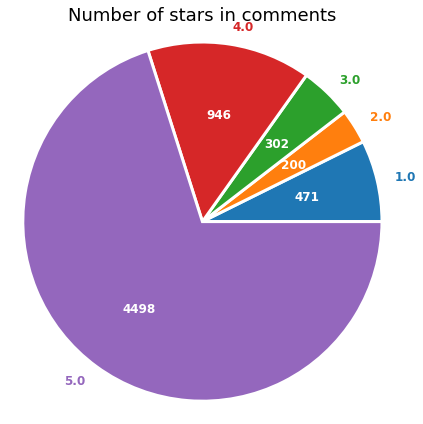

In [ ]:
data = all_comments.groupby(['number_number_of_star'])['resturant_name'].count()
labels = all_comments.groupby('number_number_of_star').groups.keys()

pie_chart(data, labels, "Number of stars in comments")

**Conclusion:** Most of the restaurants we explored got 5 stars from visitors

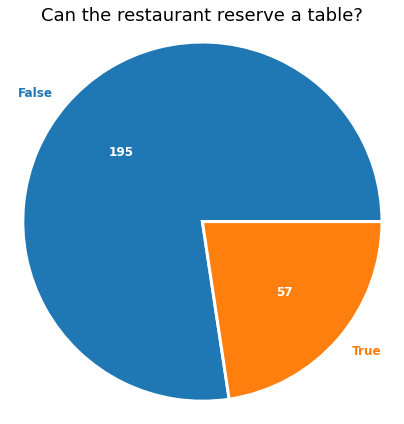

In [ ]:
data = all_resturants.groupby(['Has Table Reservation'])['Name'].count()
labels = all_resturants.groupby('Has Table Reservation').groups.keys()

pie_chart(data, labels,"Can the restaurant reserve a table?")

**Conclusion:** Most restaurants don't allow to reserve a table

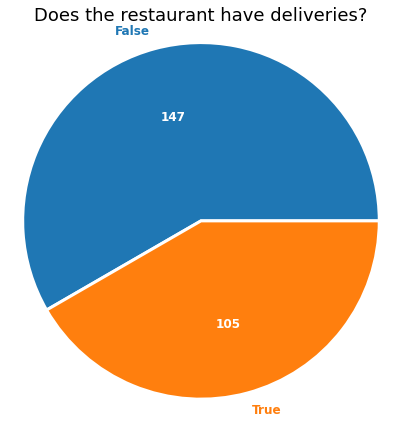

In [ ]:
data = all_resturants.groupby(['Has Deliveries'])['Name'].count()
labels = all_resturants.groupby('Has Deliveries').groups.keys()

pie_chart(data, labels,"Does the restaurant have deliveries?")

**Conclusion:** Most restaurants don't make deliveries

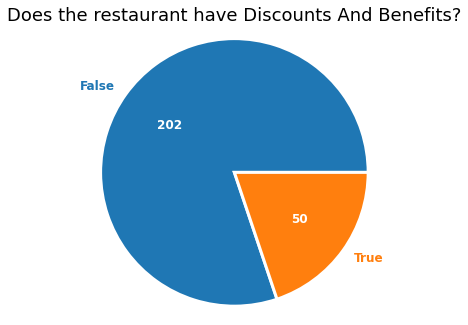

In [31]:
data = all_resturants.groupby(['Has Discounts And Benefits'])['Name'].count()
labels = all_resturants.groupby('Has Discounts And Benefits').groups.keys()

pie_chart(data, labels,"Does the restaurant have Discounts And Benefits?")

**Conclusion:** Most restaurants don't have discounts and benfits

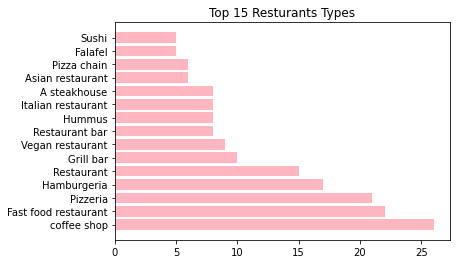

coffee shop             26
Fast food restaurant    22
Pizzeria                21
Hamburgeria             17
Restaurant              15
Grill bar               10
Vegan restaurant         9
Restaurant bar           8
Hummus                   8
Italian restaurant       8
A steakhouse             8
Asian restaurant         6
Pizza chain              6
Falafel                  5
Sushi                    5
Name: Type, dtype: int64

In [ ]:
top_resturants = 15
data = all_resturants["Type"].value_counts()[:top_resturants].values
labels = all_resturants["Type"].value_counts()[:top_resturants].keys()

horizontal_bar_chart(data, labels, ("Top "+ str(top_resturants)+ " Resturants Types"), "lightpink")
all_resturants["Type"].value_counts()[:top_resturants]

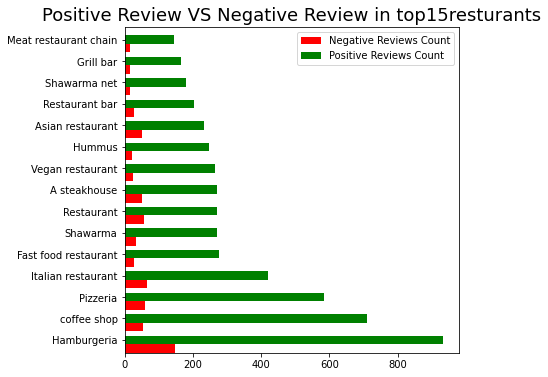

,Positive Reviews Count,Negative Reviews Count
Type,,
Hamburgeria,934,147
coffee shop,711,55
Pizzeria,585,60
Italian restaurant,421,66
Fast food restaurant,278,28
Shawarma,271,33
Restaurant,270,58
A steakhouse,270,50
Vegan restaurant,266,24


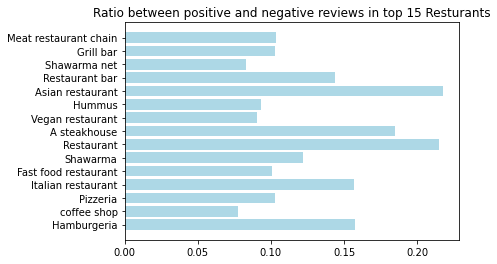

In [ ]:
top_resturants = 15

df1= all_resturants[["Type", "Positive Reviews Count", "Negative Reviews Count"]]
df2 = df1.groupby(['Type']).sum()

positive_and_negative_review_by_type=df2.sort_values("Positive Reviews Count", ascending=False).head(top_resturants)


two_columns_bar_chart(positive_and_negative_review_by_type, "Negative Reviews Count","Positive Reviews Count",
                      ("Positive Review VS Negative Review in top" + str(top_resturants) + "resturants"))
positive_and_negative_review_by_type

positive_and_negative_review_by_type["Ratio"] = ratio= positive_and_negative_review_by_type["Negative Reviews Count"] / positive_and_negative_review_by_type["Positive Reviews Count"]
horizontal_bar_chart(ratio, positive_and_negative_review_by_type.iloc[:,0].keys().tolist(),
                     ("Ratio between positive and negative reviews in top "+ str(top_resturants)+ " Resturants"),
                     "lightblue")


We can see that the type of restaurant with the most positive and negative reviews is a hamburger, a hamburger is a common dish and therefore every hamburger restaurant has a different taste and degree of making and therefore there are many disagreements about hamburger restaurants, On the other hand, the other restaurants, for example in cafes, have relatively uniform meals that are adapted to Israeli culture   

,Year,Total comments
0,2011,3
1,2012,9
2,2013,13
3,2014,16
4,2015,19
5,2016,63
6,2017,395
7,2018,1002
8,2019,1615
9,2020,1366


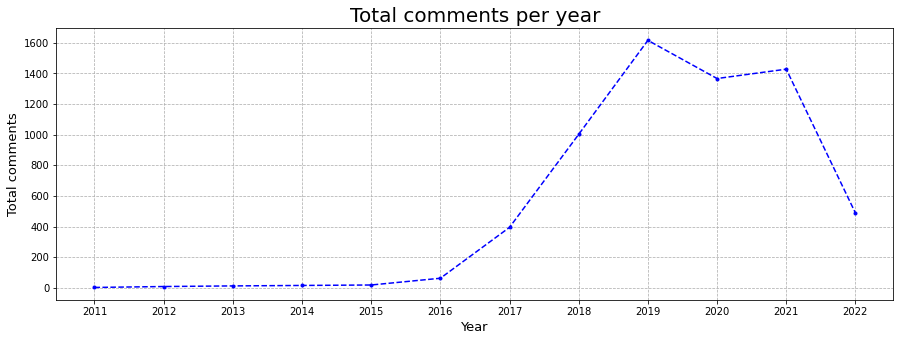

In [ ]:
year_arr = list(all_comments["customer_reviews_date"])
year_arr = [date.split('/')[-1] for date in year_arr]
unique_elements, counts_elements = np.unique(year_arr, return_counts=True)

grid_chart(counts_elements, unique_elements, "Year", "Total comments","Total comments per year")

pd.DataFrame(data = {"Year":unique_elements, "Total comments": counts_elements})

**Conclusion:** Starting in 2019, there has been a decline in the number of critics' reviews

Text(0, 0.5, 'Number Of Reviews')

Text(0.5, 0, 'Name')

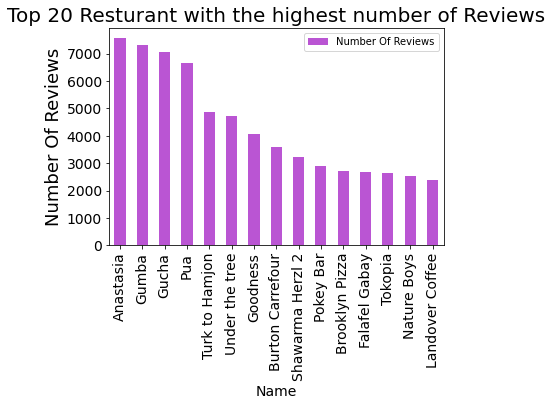

,Name,Number Of Reviews
11,Anastasia,7558
156,Gumba,7319
66,Gucha,7045
19,Pua,6670
105,Turk to Hamjon,4853
5,Under the tree,4721
48,Goodness,4079
61,Burton Carrefour,3585
135,Shawarma Herzl 2,3213
240,Pokey Bar,2914


In [ ]:
top_Resturant_highest_number_Reviews = all_resturants[["Name", "Number Of Reviews"]].sort_values("Number Of Reviews", ascending=False).head(20)
top_Resturant_highest_number_Reviews = top_Resturant_highest_number_Reviews.drop_duplicates(subset='Name')
top_Resturant_highest_number_Reviews.plot.bar(x="Name", y="Number Of Reviews",title="Top 20 Resturant with the highest number of Reviews",fontsize=14,color = 'mediumorchid').title.set_size(20)
plt.ylabel("Number Of Reviews",fontsize=18)
plt.xlabel("Name",fontsize=14) 
plt.show()
top_Resturant_highest_number_Reviews



# Meachine Learning

In `update_comments_data(comments_df)` we calculate new column to predict them in learning

* `top_5_score` 
    
    top 5 words in all text sum from normalized values 


* `is_good` column calculation is: 

    **1)** top 5 words score in each comment **+** normalized comment stars

    **2)** average of (normalized score average **+** normalized stars average)

    If 1>2 `True` else `False`
    
    
* `is_good_calculate`

    The value of `is_good` before the `if` statement

In [ ]:
def get_features_matrix(list_of_comments, max_features):
    vectorizer = CountVectorizer(lowercase = True, stop_words="english", max_features=max_features)
    return vectorizer.fit_transform(list_of_comments["comments"])

def get_features_names(list_of_comments, max_features):
    vectorizer = CountVectorizer(lowercase = True, stop_words="english", max_features=max_features)
    vectorizer.fit_transform(list_of_comments["comments"])
    return vectorizer.get_feature_names()

def get_normalized(features_matrix):
    features_matrix_normalized = preprocessing.normalize(features_matrix, norm='l1')
    return features_matrix_normalized

def merge_all_resturants_comments(comments_df):
    resturants_names = comments_df['resturant_name'].unique().tolist()
    merged_comments =  pd.DataFrame()
    for name in resturants_names:
        merged_comments = merged_comments.append({"resturant_name":name,
                                                 "comments": '\n'.join(comments_df[comments_df["resturant_name"] == name].comments.tolist()),
                                                 "stars_avg": comments_df[comments_df["resturant_name"] == name].number_number_of_star.mean()}
                                                 , ignore_index=True)
    return merged_comments

def update_comments_data(comments_df):
    data = comments_df.copy()
    features = get_features_matrix(comments_df, 10)
    features_names = get_features_names(comments_df, 10)
    normalized = get_normalized(features)
    top_5_features_names = get_features_names(comments_df, 5) 
    top_5_score = []
    is_good_calculate = []
    is_good = []

    for feat_index,feature in enumerate(features_names):
        data[feature] = normalized[:,feat_index].toarray()
        
    for comment_index, row in data.iterrows():
        comment_result = 0
        for top_feat in top_5_features_names:
            comment_result = comment_result + row[top_feat]
        top_5_score.append(comment_result)
    
    data["top_5_score"] = top_5_score

    normalized_stars_avg = comments_df["number_number_of_star"].mean()/5
    normalized_top_5_score_avg = np.average(top_5_score)

    for comment_index, row in data.iterrows():      
        is_good_calculate.append(row["top_5_score"] * (row["number_number_of_star"]/5))
        is_good.append(row["top_5_score"] + (row["number_number_of_star"]/5) > (normalized_top_5_score_avg + normalized_stars_avg)/2)
    data["is_good_calculate"] = is_good_calculate
    data["is_good"] = is_good
    return data

def wordcloud_visualization(data):
    vectorizer=CountVectorizer(lowercase=True, stop_words="english")

    text = '\n '.join(data['comments'].str.strip('"').tolist())
    freqDist="test"
    freq_vec=vectorizer.fit_transform([text]).toarray() # the function requires as input an array of docs..
    freqDist=dict(zip(vectorizer.get_feature_names(),freq_vec[0])) # create a dictionary from the first (and only) row
    freqDist=dict(sorted(freqDist.items(), key=lambda item: item[1],reverse=True)) # ascending sort..

    wordcloud = WordCloud(max_font_size=50, max_words=75, background_color="white").generate_from_frequencies(freqDist)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

import again all resturants and comments

In [ ]:
all_comments = load_dataset('.' + os.sep + 'data' + os.sep + 'cleaned_comments.csv')
all_resturants = load_dataset('.' + os.sep + 'data' + os.sep + 'cleaned_resturants.csv')


updated_comments= update_comments_data(all_comments)
save_df(updated_comments,'.' + os.sep + 'data' + os.sep + 'updated_comments.csv')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


The most common words in the comments

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


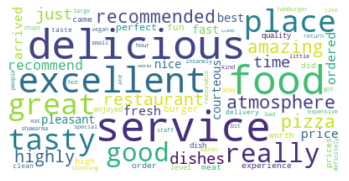

In [ ]:
wordcloud_visualization(updated_comments)

split the data for trainig (70%) and testing (30%)

In [ ]:
df_copy_learn=updated_comments[np.concatenate((["is_good", "is_good_calculate", "top_5_score", "number_number_of_star"],get_features_names(all_comments, 10)), axis=0)].copy()

df_train = df_copy_learn.sample(frac = 0.7)

df_test= df_copy_learn.drop(df_train.index)

df_copy_learn
df_train
df_test

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,is_good,is_good_calculate,top_5_score,number_number_of_star,atmosphere,delicious,excellent,food,good,great,place,really,service,tasty
0,False,0.0,0.0,3.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0
1,False,0.0,0.0,2.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0
2,False,0.0,0.0,3.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0
3,True,0.8,1.0,4.0,0.0,0.50,0.00,0.0,0.00,0.0,0.5,0.00,0.00,0.0
4,False,0.0,0.0,2.0,0.0,0.00,0.00,0.0,1.00,0.0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,True,1.0,1.0,5.0,0.0,0.25,0.00,0.5,0.00,0.0,0.0,0.00,0.25,0.0
6413,True,0.5,0.5,5.0,0.0,0.00,0.25,0.0,0.25,0.0,0.0,0.25,0.25,0.0
6414,True,1.0,1.0,5.0,0.0,0.50,0.00,0.0,0.00,0.0,0.5,0.00,0.00,0.0
6415,True,1.0,1.0,5.0,0.0,0.25,0.00,0.5,0.00,0.0,0.0,0.00,0.25,0.0


,is_good,is_good_calculate,top_5_score,number_number_of_star,atmosphere,delicious,excellent,food,good,great,place,really,service,tasty
3426,False,0.100000,0.500000,1.0,0.0,0.500000,0.000000,0.000000,0.000000,0.500000,0.00,0.0,0.000000,0.0
5007,True,0.600000,1.000000,3.0,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.00,0.0,0.500000,0.0
4541,True,0.600000,0.750000,4.0,0.0,0.250000,0.000000,0.000000,0.250000,0.000000,0.25,0.0,0.250000,0.0
2144,True,1.000000,1.000000,5.0,0.0,0.000000,0.500000,0.000000,0.000000,0.000000,0.00,0.0,0.500000,0.0
1983,True,1.000000,1.000000,5.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4605,True,0.000000,0.000000,5.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.0
5600,True,0.533333,0.666667,4.0,0.0,0.000000,0.333333,0.000000,0.333333,0.000000,0.00,0.0,0.333333,0.0
3267,True,0.666667,0.666667,5.0,0.0,0.333333,0.000000,0.000000,0.333333,0.000000,0.00,0.0,0.333333,0.0
2531,True,1.000000,1.000000,5.0,0.0,0.750000,0.000000,0.250000,0.000000,0.000000,0.00,0.0,0.000000,0.0


,is_good,is_good_calculate,top_5_score,number_number_of_star,atmosphere,delicious,excellent,food,good,great,place,really,service,tasty
2,False,0.0,0.0,3.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0
5,True,0.3,0.3,5.0,0.1,0.00,0.0,0.20,0.10,0.0,0.1,0.40,0.0,0.1
9,True,0.0,0.0,4.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0
12,True,0.4,0.5,4.0,0.0,0.00,0.0,0.50,0.00,0.0,0.0,0.00,0.0,0.5
13,True,0.2,1.0,1.0,0.0,0.00,0.0,1.00,0.00,0.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6398,True,1.0,1.0,5.0,0.0,1.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0
6401,True,0.5,0.5,5.0,0.0,0.25,0.0,0.25,0.25,0.0,0.0,0.25,0.0,0.0
6407,True,1.0,1.0,5.0,0.0,1.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0
6408,True,1.0,1.0,5.0,0.0,0.50,0.0,0.00,0.00,0.0,0.0,0.00,0.5,0.0


We want to predict the value for `is_good` column.

The column has `True`/`False` values and it had calculation backstage.

The calculation is: 

**1)** top 5 word score in each comment **+** normalized comment stars

**2)** average of (normalized score average **+** normalized stars average)

If 1>2 `True` else `False`

--------

we will be using 70% of the data to train the model, and the test size will be 30% of the data.

In [ ]:
TRAINING_FEATURES = df_train.columns[df_train.columns != 'is_good']
TARGET_FEATURE = 'is_good'

x = df_train[TRAINING_FEATURES]
y = df_train[TARGET_FEATURE]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30) 


print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3144, 13) (3144,)
(1348, 13) (1348,)


In [ ]:
linear_model_regression = linear_model.LinearRegression()
linear_model_fit = linear_model_regression.fit(x_train, y_train)
lrm_predictions = linear_model_regression.predict(x_test)

In [ ]:
print("Final Score is: ", linear_model_fit.score(x_test, y_test))

Final Score is:  0.8495289472309784
